In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
#%matplotlib inline
import seaborn as sns
from IPython.display import Image
import re
from scipy.stats import chi2
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
print("Setup Complete")

Setup Complete


In [ ]:
### DF2 CONTIENE DATOS DE UNA MUESTRA DE ELECTORES NATIVSO Y EXTRANJEROS 
#DE UN DISTRITO DE LA PROVINCIA DE BUENSO AIRES
#SE AGREGAN LAS COORDENADAS DE LOS DOMICILIOS Y LA DISTANCIA HASTA EL LUGAR DE VOTACIÓN

#df2=pd.read_csv('C:/Users/maria/Documents/2022DIGITALHOUSE/TP INTEGRADOR/df2.csv')

#Cargar el dataset
df_filepath = '/content/drive/MyDrive/ColabNotebooks/df2.csv'
df2 = pd.read_csv(df_filepath)
df2.head()

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75

In [ ]:
#CONTROLAR QUE ID NO ESTÁ DUPLICADO
df2.duplicated(subset=['ID']).unique()

array([False])

In [ ]:
df2.ORIGEN.fillna("DESCONOCIDO", inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4841 non-null   int64  
 1   MATRICULA        4841 non-null   int64  
 2   SEXO             4841 non-null   object 
 3   TIPO_EJEMPLAR    2387 non-null   object 
 4   CLASE            4840 non-null   float64
 5   CIRCOD           4841 non-null   object 
 6   LOCALIDAD        4841 non-null   object 
 7   MESA             4841 non-null   int64  
 8   VOTO_PASO        4841 non-null   int64  
 9   VOTO_GENERAL     4841 non-null   int64  
 10  NATIVOS          4841 non-null   int64  
 11  ESTABLECIMIENTO  4841 non-null   object 
 12  LAT              4841 non-null   float64
 13  LONG             4841 non-null   float64
 14  DISTANCIA        4841 non-null   int64  
 15  ANTIGUEDAD       4840 non-null   float64
 16  ORIGEN           4841 non-null   object 
dtypes: float64(4),

In [ ]:
###DISTRIBUCION DE LA VARIABLE TARGET
print(df2.VOTO_GENERAL.value_counts())
print(df2['VOTO_GENERAL'].value_counts(normalize=True))

0    2620
1    2221
Name: VOTO_GENERAL, dtype: int64
0    0.54121
1    0.45879
Name: VOTO_GENERAL, dtype: float64


<Axes: xlabel='DISTANCIA'>

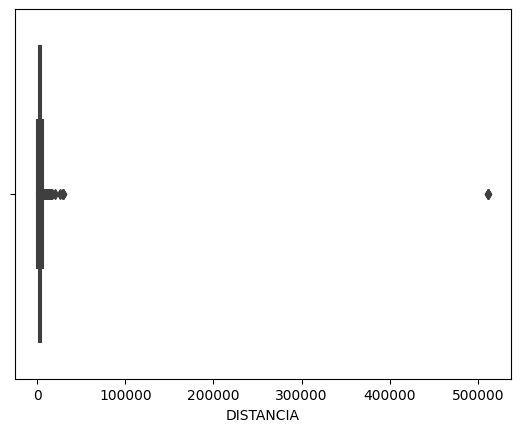

In [ ]:
###DISTANCIA
import seaborn as sns
sns.boxplot(x=df2['DISTANCIA'])

<Axes: xlabel='DISTANCIA'>

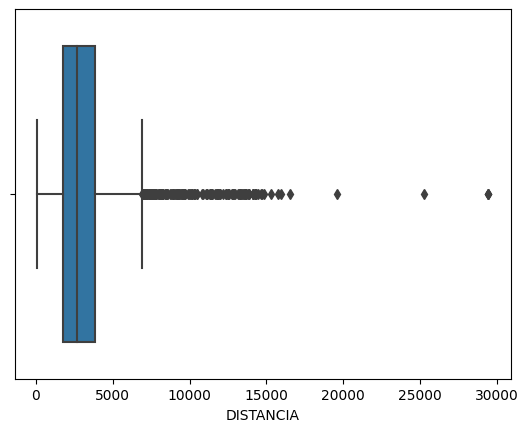

In [ ]:
###QUITAR OUTLIERS DE DISTANCIA (distancia mayor a 100 kms)
df2 = df2[df2['DISTANCIA'] < 100000]  
###DISTNACIA
import seaborn as sns
sns.boxplot(x=df2['DISTANCIA'])


<Axes: xlabel='CLASE'>

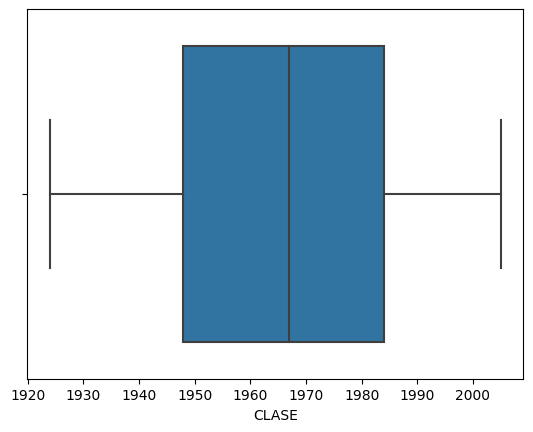

In [ ]:
###CLASE

###QUITAR OUTLIERS DE DISTANCIA (distancia mayor a 100 kms)
df2 = df2[df2['CLASE'] > 1923]  
import seaborn as sns
sns.boxplot(x=df2['CLASE'])

In [ ]:
df2.shape

(4829, 17)

In [ ]:
###HACER DUMMIES DE SEXO 
#DF ES LA VERSION CON DUMMIES Y df2 SEXO

df=pd.get_dummies(df2, columns = ['SEXO'], drop_first=True)
df.head()

,ID,MATRICULA,TIPO_EJEMPLAR,CLASE,CIRCOD,LOCALIDAD,MESA,VOTO_PASO,VOTO_GENERAL,NATIVOS,ESTABLECIMIENTO,LAT,LONG,DISTANCIA,ANTIGUEDAD,ORIGEN,SEXO_M
0,1220,24220,DNI-EA,1974.0,590,TEMPERLEY,1135,1,1,1,ESCUELA EP N°69/ES N°57,-34.768411,-58.385937,111,5.0,ARGENTINA,0
1,912,18155,DNI-EA,1966.0,590,TEMPERLEY,1108,1,1,1,ESCUELA EP N°45/ES N°350,-34.766611,-58.378062,112,7.0,ARGENTINA,0
2,1008,21110,DNI-EA,1969.0,590,TEMPERLEY,1108,1,1,1,ESCUELA EP N°45/ES N°350,-34.766611,-58.378062,112,6.0,ARGENTINA,1
3,891,17810,DNI-EB,1966.0,590,TEMPERLEY,1087,1,1,1,ESCUELA ESB N°5,-34.775912,-58.390526,129,7.0,ARGENTINA,1
4,1305,25645,DNI-EB,1976.0,590,TEMPERLEY,1060,1,1,1,COLEGIO TOMAS JEFFERSON (EP),-34.775343,-58.369812,134,5.0,ARGENTINA,0


In [ ]:
#CREAR EDAD DESDE CLASE (2021-CLASE)
df['EDAD']=2021-df['CLASE']
df.head()

,ID,MATRICULA,TIPO_EJEMPLAR,CLASE,CIRCOD,LOCALIDAD,MESA,VOTO_PASO,VOTO_GENERAL,NATIVOS,ESTABLECIMIENTO,LAT,LONG,DISTANCIA,ANTIGUEDAD,ORIGEN,SEXO_M,EDAD
0,1220,24220,DNI-EA,1974.0,590,TEMPERLEY,1135,1,1,1,ESCUELA EP N°69/ES N°57,-34.768411,-58.385937,111,5.0,ARGENTINA,0,47.0
1,912,18155,DNI-EA,1966.0,590,TEMPERLEY,1108,1,1,1,ESCUELA EP N°45/ES N°350,-34.766611,-58.378062,112,7.0,ARGENTINA,0,55.0
2,1008,21110,DNI-EA,1969.0,590,TEMPERLEY,1108,1,1,1,ESCUELA EP N°45/ES N°350,-34.766611,-58.378062,112,6.0,ARGENTINA,1,52.0
3,891,17810,DNI-EB,1966.0,590,TEMPERLEY,1087,1,1,1,ESCUELA ESB N°5,-34.775912,-58.390526,129,7.0,ARGENTINA,1,55.0
4,1305,25645,DNI-EB,1976.0,590,TEMPERLEY,1060,1,1,1,COLEGIO TOMAS JEFFERSON (EP),-34.775343,-58.369812,134,5.0,ARGENTINA,0,45.0


In [ ]:
###DESCARTAR ID, MATRICULA y TIPO DE EJEMPLAR QUE ESTA SOLO PARA NATIVOS.
###DESCARTAMOS CLASE PORQUE CORRELACIONA PERFECTAMENTE CON EDAD
###DESCARTAMOS CIRCOD PORQUE NO TIENE VARIABILIDAD (NO APORTA INFORMACIÓN)

data=df[['EDAD', 'LOCALIDAD',
       'MESA', 'VOTO_PASO', 'VOTO_GENERAL', 'NATIVOS', 'ESTABLECIMIENTO',
       'LAT', 'LONG', 'DISTANCIA', 'ANTIGUEDAD', 'ORIGEN', 'SEXO_M']]

In [ ]:
###CREAR CATEGORIA OTROS QUE AGRUPA PAISES DE ORIGEN CON FRECUENCIA MENOR A 5
data.ORIGEN.value_counts()
counts = data['ORIGEN'].value_counts()
idx = counts[counts.lt(5)].index

data.loc[df['ORIGEN'].isin(idx), 'ORIGEN'] = 'OTRO'
data.ORIGEN.value_counts()

ARGENTINA                  2413
DESCONOCIDO                 578
ITALIA                      457
PARAGUAY                    372
ESPAÑA                      249
BOLIVIA                     215
URUGUAY                     164
REPUBLICA POPULAR CHINA      91
CHILE                        76
PERU                         56
OTRO                         30
BRASIL                       26
JAPON                        25
YUGOSLAVIA                   11
ESTADOS UNIDOS               11
VENEZUELA                    10
ALEMANIA                      9
COLOMBIA                      9
PORTUGAL                      9
CUBA                          7
POLONIA                       6
FRANCIA                       5
Name: ORIGEN, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4829 entries, 0 to 4840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDAD             4829 non-null   float64
 1   LOCALIDAD        4829 non-null   object 
 2   MESA             4829 non-null   int64  
 3   VOTO_PASO        4829 non-null   int64  
 4   VOTO_GENERAL     4829 non-null   int64  
 5   NATIVOS          4829 non-null   int64  
 6   ESTABLECIMIENTO  4829 non-null   object 
 7   LAT              4829 non-null   float64
 8   LONG             4829 non-null   float64
 9   DISTANCIA        4829 non-null   int64  
 10  ANTIGUEDAD       4829 non-null   float64
 11  ORIGEN           4829 non-null   object 
 12  SEXO_M           4829 non-null   uint8  
dtypes: float64(4), int64(5), object(3), uint8(1)
memory usage: 495.2+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


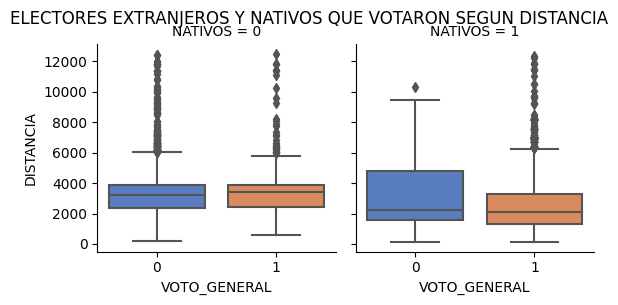

In [ ]:
###GRAFICOS NATIVOS EXTRANJEROS
#DISTANCIA
dfplot=df2[df2.DISTANCIA < np.percentile(df2.DISTANCIA,99)]
import seaborn as sns, matplotlib.pyplot as plt

g = sns.FacetGrid(dfplot,col='NATIVOS',col_wrap=2)
#                                               change this to 4 ^
g.map(sns.boxplot,'VOTO_GENERAL','DISTANCIA',palette='muted')
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
plt.tight_layout()
plt.suptitle('ELECTORES EXTRANJEROS Y NATIVOS QUE VOTARON SEGUN DISTANCIA', y=1)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


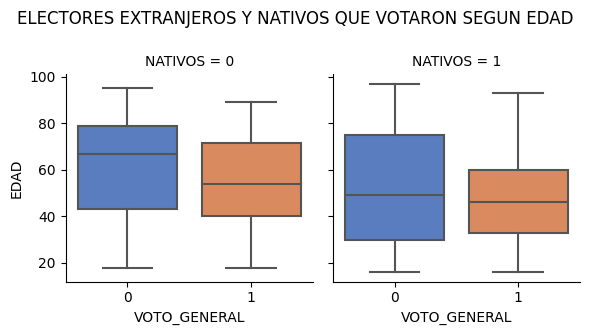

In [ ]:
###GRAFICOS NATIVOS EXTRANJEROS
#EDAD
dfplot=df #[df2.EDAD < np.percentile(df2.DISTANCIA,99)]
import seaborn as sns, matplotlib.pyplot as plt

g = sns.FacetGrid(dfplot,col='NATIVOS',col_wrap=2)
#                                               change this to 4 ^
g.map(sns.boxplot,'VOTO_GENERAL','EDAD',palette='muted')
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
plt.tight_layout()
plt.suptitle('ELECTORES EXTRANJEROS Y NATIVOS QUE VOTARON SEGUN EDAD', y=1.1)
plt.show()

In [ ]:
# TABLE DE FRECUENCIA PARTICIPACION DE NATIVOS Y EXTRANJEROS
cross_tab = pd.crosstab(index=df['NATIVOS'],
                        columns=df['VOTO_GENERAL'])

print(cross_tab)

cross_tab_prop = pd.crosstab(index=df['NATIVOS'],
                        columns=df['VOTO_GENERAL'],
                             normalize="index")

print(cross_tab_prop)

VOTO_GENERAL     0     1
NATIVOS                 
0             2046   370
1              563  1850
VOTO_GENERAL         0         1
NATIVOS                         
0             0.846854  0.153146
1             0.233320  0.766680


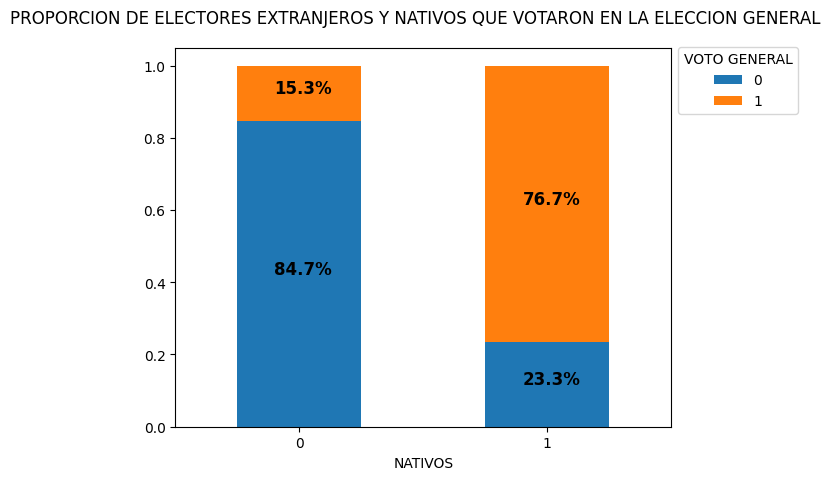

In [ ]:
# CREAR GRAFICO DE BARRAS
pl = cross_tab_prop.plot(kind="bar", stacked=True, rot=0)
pl.legend(title='VOTO GENERAL',bbox_to_anchor=(1, 1.02), loc='upper left')

# AGREGAR ANOTACIONES

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.10,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
plt.subplots_adjust(top=.9)
plt.suptitle('PROPORCION DE ELECTORES EXTRANJEROS Y NATIVOS QUE VOTARON EN LA ELECCION GENERAL')

plt.show()

In [ ]:
data.corrwith(data["VOTO_GENERAL"])

<ipython-input-26-cb3f589c4228>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data["VOTO_GENERAL"])


EDAD           -0.278129
MESA           -0.615565
VOTO_PASO       0.765882
VOTO_GENERAL    1.000000
NATIVOS         0.615535
LAT            -0.090343
LONG           -0.029713
DISTANCIA      -0.105562
ANTIGUEDAD     -0.230437
SEXO_M          0.005117
dtype: float64

<ipython-input-27-65a7d610ebbe>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


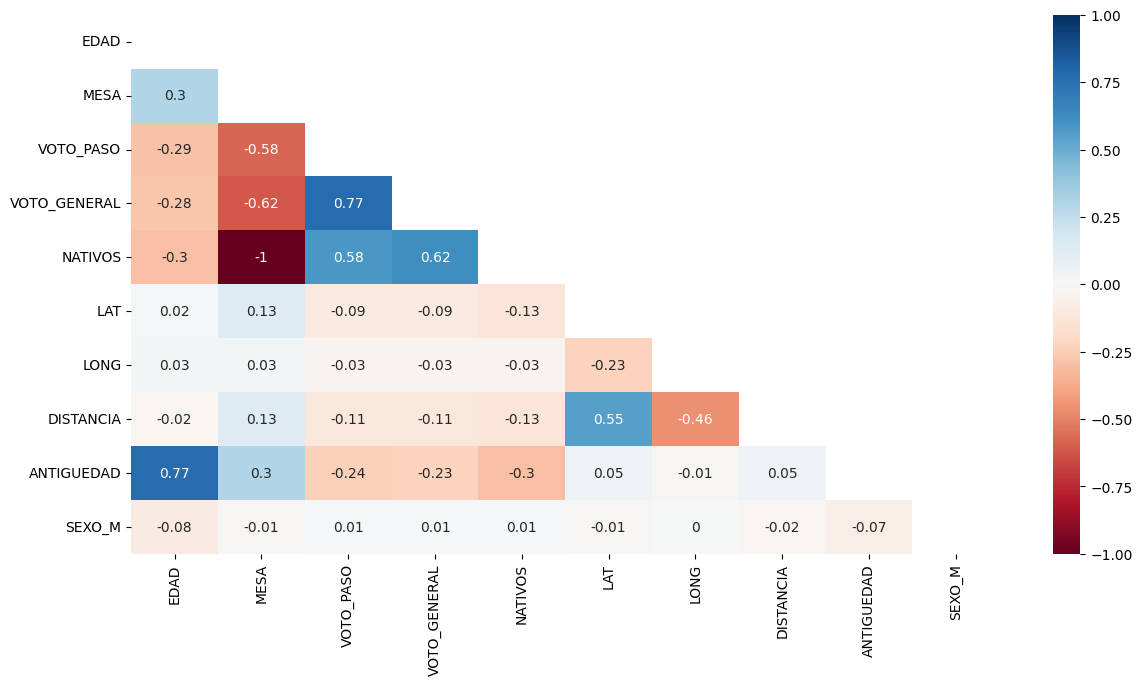

In [ ]:
###MATRIZ DE CORRELACION
df_num= data.select_dtypes(include='number')

correlation = df_num.corr().round(2)
plt.figure(figsize = (14,7))
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
sns.heatmap(correlation, mask=mask, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
plt.show()

###SE USA DF PORQUE ES LA VERSION CON DUMMIES

In [ ]:
### QUITAMOS MESA PORQUE COMO HAY MESAS DE EXTRANJEROS Y MESAS DE NATIVOS CORRELACIONA COMPLETAMENTE CON NATIVOS
data=data[['EDAD', 'LOCALIDAD', 'VOTO_PASO', 'VOTO_GENERAL', 'NATIVOS',
       'ESTABLECIMIENTO', 'LAT', 'LONG', 'DISTANCIA', 'ANTIGUEDAD', 'ORIGEN',
       'SEXO_M']]

###SELECCION DE VARIABLES PREDICTORAS
- EDAD
- LOCALIDAD
- NATIVOS
- ESTABLECIMIENTO
- LAT
- LONG
- DISTANCIA
- ANTIGUEDAD
- ORIGEN
- SEXO_M
- VOTO_PASO

In [ ]:
###PREPARAR LOS DATOS

#ARMAMOS DF TEMPORARIO

df_tmp = df[['EDAD', 'ANTIGUEDAD', 'NATIVOS', 'LAT', 'LONG', 'DISTANCIA', 'SEXO_M', 'VOTO_GENERAL', 'VOTO_PASO']]

In [ ]:
###LABEL ENCODING

# Creamos un LabelEncoder
label_encoder = LabelEncoder()

df_enc = data[['ORIGEN', 'LOCALIDAD', 'ESTABLECIMIENTO']]

label_encoder.fit(df_enc['ORIGEN'].unique())
df_enc['ORIGEN']= label_encoder.transform(df_enc['ORIGEN'])

label_encoder.fit(df_enc['LOCALIDAD'].unique())
df_enc['LOCALIDAD']= label_encoder.transform(df_enc['LOCALIDAD'])

label_encoder.fit(df_enc['ESTABLECIMIENTO'].unique())
df_enc['ESTABLECIMIENTO']= label_encoder.transform(df_enc['ESTABLECIMIENTO'])

df_enc


<ipython-input-30-c43bb67ed9dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enc['ORIGEN']= label_encoder.transform(df_enc['ORIGEN'])
<ipython-input-30-c43bb67ed9dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enc['LOCALIDAD']= label_encoder.transform(df_enc['LOCALIDAD'])
<ipython-input-30-c43bb67ed9dc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,ORIGEN,LOCALIDAD,ESTABLECIMIENTO
0,1,3,9
1,1,3,7
2,1,3,7
3,1,3,11
4,1,3,1
...,...,...,...
4836,7,0,5
4837,7,3,5
4838,7,3,5
4839,7,0,5


In [ ]:
###UNIMOS DFTEMPORARIO CON LAS CATEGORICAS TRANSFORMADAS CON LABEL ENCODING
df_cp = pd.concat([df_enc, 
                     df_tmp
                     ], axis = 1)
df_cp

,ORIGEN,LOCALIDAD,ESTABLECIMIENTO,EDAD,ANTIGUEDAD,NATIVOS,LAT,LONG,DISTANCIA,SEXO_M,VOTO_GENERAL,VOTO_PASO
0,1,3,9,47.0,5.0,1,-34.768411,-58.385937,111,0,1,1
1,1,3,7,55.0,7.0,1,-34.766611,-58.378062,112,0,1,1
2,1,3,7,52.0,6.0,1,-34.766611,-58.378062,112,1,1,1
3,1,3,11,55.0,7.0,1,-34.775912,-58.390526,129,1,1,1
4,1,3,1,45.0,5.0,1,-34.775343,-58.369812,134,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4836,7,0,5,59.0,5.0,0,-34.756194,-58.343212,6900,0,0,0
4837,7,3,5,57.0,4.0,0,-34.774627,-58.395618,2031,0,0,0
4838,7,3,5,59.0,4.0,0,-34.769012,-58.383237,2543,1,0,0
4839,7,0,5,71.0,4.0,0,-34.761068,-58.429852,3845,1,0,0


In [ ]:
###CHEQUEAMOS QUE TODAS SEAN ENTEROS
df_cp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4829 entries, 0 to 4840
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORIGEN           4829 non-null   int64  
 1   LOCALIDAD        4829 non-null   int64  
 2   ESTABLECIMIENTO  4829 non-null   int64  
 3   EDAD             4829 non-null   float64
 4   ANTIGUEDAD       4829 non-null   float64
 5   NATIVOS          4829 non-null   int64  
 6   LAT              4829 non-null   float64
 7   LONG             4829 non-null   float64
 8   DISTANCIA        4829 non-null   int64  
 9   SEXO_M           4829 non-null   uint8  
 10  VOTO_GENERAL     4829 non-null   int64  
 11  VOTO_PASO        4829 non-null   int64  
dtypes: float64(4), int64(7), uint8(1)
memory usage: 457.4 KB


In [ ]:
#Se transforma valor a Entero

df_cp['SEXO_M'] = df_cp['SEXO_M'].astype('int64')

df_cp['SEXO_M'].dtype

dtype('int64')

In [ ]:
#Se transforma valor a Entero

df_cp['EDAD'] = df_cp['EDAD'].astype('int64')

df_cp['EDAD'].dtype

dtype('int64')

In [ ]:
#Se transforma valor a Entero

df_cp['ANTIGUEDAD'] = df_cp['ANTIGUEDAD'].astype('int64')

df_cp['ANTIGUEDAD'].dtype

dtype('int64')

In [ ]:
###GUARDAR DF PARA TRABAJAR
df_cp.to_csv('data2vf.csv', index=False)

In [ ]:
### ARBOL SIMPLE SIN PARTICIPACIÓN EN PRIMARIAS
X = df_cp.drop(['VOTO_GENERAL', "VOTO_PASO"], axis=1)
print(X.shape)

y = df_cp.VOTO_GENERAL

print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 28, stratify= y, test_size= 0.30)

(4829, 10)
(4829,)


In [ ]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
y_train

4365    1
3827    0
4102    1
1855    1
2352    1
       ..
4572    0
1350    1
110     0
665     1
1064    1
Name: VOTO_GENERAL, Length: 3380, dtype: int64

In [ ]:
import sklearn.tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
model_as = DecisionTreeClassifier(criterion='gini')
fit_as = model_as.fit(X_train_scl, y_train)

In [ ]:
predict_class = fit_as.predict(X_test_scl)
accuracy_class = accuracy_score(y_test, predict_class)
print(accuracy_class)

conf_class = confusion_matrix(y_test, predict_class)
print(conf_class)

0.6970324361628709
[[575 208]
 [231 435]]


In [ ]:
TP = conf_class[1, 1]; TN = conf_class[0, 0] ; FP = conf_class[0, 1] ; FN = conf_class[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  435  TN:  575  FP:  208  FN:  231


Text(0.5, 36.72222222222221, 'Predicciones')

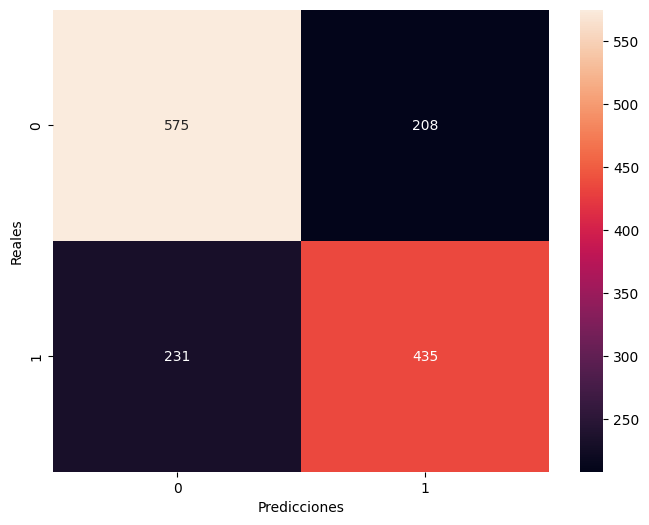

In [ ]:
# MATRIZ DE CONFUSION
#CREAR FIGURA
fig, ax = plt.subplots(figsize=(8, 6))

# CREAR NATRIZ DE CONFUSION CON HEATMAP
sns.heatmap(confusion_matrix(y_test, predict_class), annot=True, fmt='.0f', ax=ax)

# ETIQUETAS DE EJES
plt.ylabel('Reales')
plt.xlabel('Predicciones')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true=y_test, y_pred=predict_class)

0.677570093457944

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true=y_test, y_pred=predict_class)

0.6531531531531531

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true=y_test, y_pred=predict_class)

0.665137614678899

In [ ]:
#Specificidad
TN / (TN + FP)

0.735632183908046

In [ ]:
pd.DataFrame({'atributo':X.columns, 'importancia':model_as.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
5,NATIVOS,0.367232
3,EDAD,0.169258
6,LAT,0.127033
7,LONG,0.119777
8,DISTANCIA,0.111192
2,ESTABLECIMIENTO,0.037695
9,SEXO_M,0.027283
0,ORIGEN,0.022241
4,ANTIGUEDAD,0.017876
1,LOCALIDAD,0.000414


In [ ]:
###XGBOOST SIN PARTICIPACION EN PRIMARIAS

X = df_cp.drop(['VOTO_GENERAL', "VOTO_PASO"], axis=1)
print(X.shape)

y = df_cp.VOTO_GENERAL

print(y.shape)

#DIVIDIR TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

(4829, 10)
(4829,)


In [ ]:
#CREAR UN GENERADOR DE CV
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
#INSTANCIAR CLASIFICADOR
model_xg = XGBClassifier(n_jobs=-1)

In [ ]:
###DEFINIR HIPERPARÁMTEROS DE XGBOOST
params = {  
    "n_estimators": [50,100,500],      # Cantidad de modelos base.
    "max_depth": [1,2,3,4,5],            # máxima profundidad de arboles.
    "learning_rate": [0.01, 0.03, 0.05],      # tasa de aprendizaje
}

In [ ]:
#CONSTRUYE EL MODELO QUE VAMOS A ENTRENAR RECORRIENDO TODAS LAS OPCIONES QUE LE DIMOS
#from sklearn.model_selection import GridSearchCV
xgb = GridSearchCV(model_xg, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [ ]:
X_train

,ORIGEN,LOCALIDAD,ESTABLECIMIENTO,EDAD,ANTIGUEDAD,NATIVOS,LAT,LONG,DISTANCIA,SEXO_M
2997,11,3,5,85,7,0,-34.766285,-58.392777,979,1
1865,1,3,0,67,9,1,-34.765152,-58.357618,4046,0
1742,1,3,10,59,7,1,-34.775409,-58.371494,3152,0
346,1,3,9,46,5,1,-34.766679,-58.392461,1000,1
379,1,3,9,53,6,1,-34.766377,-58.392705,1040,1
...,...,...,...,...,...,...,...,...,...,...
2728,7,3,5,63,8,0,-34.747872,-58.352213,5472,1
3304,11,3,5,90,7,0,-34.761153,-58.379327,2513,0
868,1,3,11,21,1,1,-34.767593,-58.395184,1695,1
794,1,3,0,59,7,1,-34.770233,-58.381575,1607,0


In [ ]:
#ENTRENAMOS
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.05],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 500]},
             verbose=1)

In [ ]:
# VER MEJORES PARÁMETROS QUE ENCONTRÓ
xgb.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100}

In [ ]:
#FUNCION PARA EVALUAR EL RENDIMIENTO DE LOS MODELOS
#from sklearn.model_selection import cross_val_score
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [ ]:
###VEMOS EL MEJOR MODELO ENCONTRADO CON LOS MEJORES PARAMETROS. 
# VEMOS ACCURACY EN TRAIN
evaluar_rendimiento(xgb.best_estimator_,"XG Boost", X_train, y_train, cv)


Rendimiento de XG Boost:	0.816 ± 0.007


In [ ]:
###AHORA EVALUAMOS EL RENDIMEINTO EN TEST. RECIBE VERDADEROS VALORES Y VALORES PREDICHOS.
xgb_auc = roc_auc_score(y_test, xgb.predict(X_test))
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.833394218661353


In [ ]:
xgb.predict(X_test)

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
###ACURACY EN TEST Y MATRIZ DE CONFUSION
predict_class = xgb.predict(X_test)
accuracy_class = accuracy_score(y_test, predict_class)
print(accuracy_class)

conf_class = confusion_matrix(y_test, predict_class)
print(conf_class)

0.8336092715231788
[[554 109]
 [ 92 453]]


In [ ]:
TP = conf_class[1, 1]; TN = conf_class[0, 0] ; FP = conf_class[0, 1] ; FN = conf_class[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  453  TN:  554  FP:  109  FN:  92


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true=y_test, y_pred=predict_class)

0.806049822064057

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true=y_test, y_pred=predict_class)

0.8311926605504587

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true=y_test, y_pred=predict_class)

0.8184281842818429

In [ ]:
specificity = TN / (TN + FP)
print(specificity)

0.8355957767722474


Text(0.5, 36.72222222222221, 'Prediction')

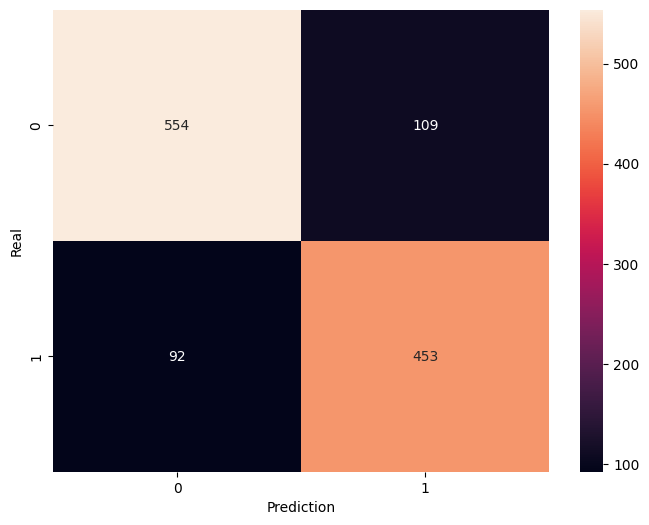

In [ ]:
# CREAR FIGURA
fig, ax = plt.subplots(figsize=(8, 6))

# MATRIZ CON HEATMAP
sns.heatmap(confusion_matrix(y_test, predict_class), annot=True, fmt='.0f', ax=ax)

# ETIQUETAS EJES
plt.ylabel('Real')
plt.xlabel('Prediction')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


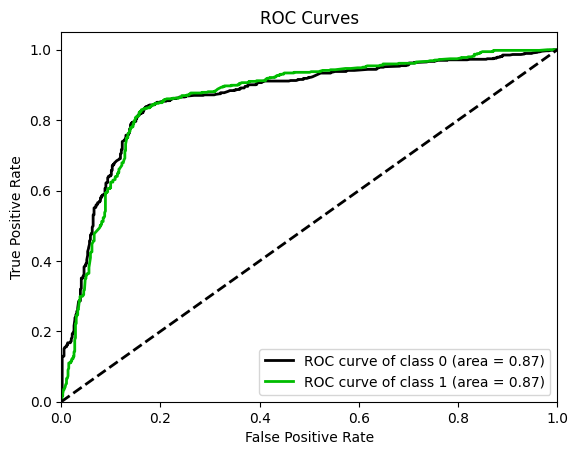

In [ ]:
###GRAFICAMOS LA CURVA ROC PARA LA CLASE 1 (FUE A VOTAR) Y LA 0 (NO FUE)
# A NOSOTROS NOS INTERESA ENCONTRAR LA CLASE 0, QUE SON LOS ELECTORES QUE NO VNA A VOTAR
!pip install scikit-plot
from scikitplot.metrics import plot_roc
plot_roc(y_test, xgb.predict_proba(X_test), plot_micro = False, plot_macro= False);

#plot_roc_curve(y_test, xgb.predict_proba(X_test), plot_micro = False, plot_macro= False);

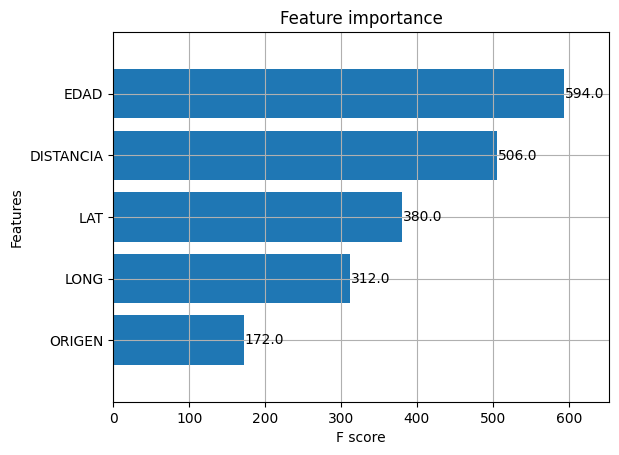

In [ ]:
# GRAFICO DE LA IMPROTANCIA DE LAS FEATURES EN LA PREDICCIÓN DE QUIENES VAN A VOTAR Y QUIENES NO
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

In [ ]:
###XGBOOST DESPUÉS DE LAS PRIMARIAS (CON DATO DE PARTICIPACION DE LAS PASO)

X = df_cp.drop(['VOTO_GENERAL'], axis=1)
print(X.shape)

y = df_cp.VOTO_GENERAL

print(y.shape)

#DIVIDIR TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

(4829, 11)
(4829,)


In [ ]:
X_train

,ORIGEN,LOCALIDAD,ESTABLECIMIENTO,EDAD,ANTIGUEDAD,NATIVOS,LAT,LONG,DISTANCIA,SEXO_M,VOTO_PASO
3408,7,3,5,93,7,0,-34.774984,-58.411105,1632,0,0
2970,21,3,5,89,7,0,-34.781647,-58.387527,2533,1,0
2365,1,3,1,73,9,1,-34.761068,-58.429852,8207,0,0
214,1,3,3,31,3,1,-34.775331,-58.376331,775,1,1
726,1,3,1,42,5,1,-34.773510,-58.380037,1518,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2048,1,3,6,30,2,1,-34.761068,-58.429852,6083,0,1
1697,1,3,4,26,2,1,-34.778793,-58.376748,3039,1,0
4151,18,3,5,35,6,0,-34.767335,-58.391018,1234,1,0
275,1,3,9,36,3,1,-34.771243,-58.392856,895,0,0


In [ ]:
#CREAR UN GENERADOR DE CV
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=19, shuffle=True)

In [ ]:
#INSTANCIAR CLASIFICADOR
model_xg = XGBClassifier(n_jobs=-1)

In [ ]:
# DEFINIR LOS HIPERPARÁMETROS
params = {  
    "n_estimators": [50,100,500, 1000],      # Cantidad de modelos base.
    "max_depth": [1,2,3,4],            # Maxima profundidad.
    "learning_rate": [0.01, 0.02, 0.03, 0.05],      # Tasa de aprendizaje
}

In [ ]:
xgb = GridSearchCV(model_xg, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [ ]:
X_train

,ORIGEN,LOCALIDAD,ESTABLECIMIENTO,EDAD,ANTIGUEDAD,NATIVOS,LAT,LONG,DISTANCIA,SEXO_M,VOTO_PASO
3408,7,3,5,93,7,0,-34.774984,-58.411105,1632,0,0
2970,21,3,5,89,7,0,-34.781647,-58.387527,2533,1,0
2365,1,3,1,73,9,1,-34.761068,-58.429852,8207,0,0
214,1,3,3,31,3,1,-34.775331,-58.376331,775,1,1
726,1,3,1,42,5,1,-34.773510,-58.380037,1518,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2048,1,3,6,30,2,1,-34.761068,-58.429852,6083,0,1
1697,1,3,4,26,2,1,-34.778793,-58.376748,3039,1,0
4151,18,3,5,35,6,0,-34.767335,-58.391018,1234,1,0
275,1,3,9,36,3,1,-34.771243,-58.392856,895,0,0


In [ ]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.05],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=1)

In [ ]:
xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}

In [ ]:
#FUNCION PARA EVALUAR EL RENDIMIENTO DE LOS MODELOS
#from sklearn.model_selection import cross_val_score
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [ ]:
###EVALUAR EL RENDIMIENTO EN TRAIN
evaluar_rendimiento(xgb.best_estimator_,"XG Boost", X_train, y_train, cv)

Rendimiento de XG Boost:	0.882 ± 0.008


In [ ]:
###EVALUAR EL RENDIMIENTO EN TEST
evaluar_rendimiento(xgb.best_estimator_,"XG Boost", y_test, xgb.predict(X_test), cv)

Rendimiento de XG Boost:	0.89 ± 0.024


In [ ]:
xgb_auc = roc_auc_score(y_test, xgb.predict(X_test))
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.8900491672572642


In [ ]:
xgb.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

###METRICAS

In [ ]:
predict_class = xgb.predict(X_test)
accuracy_class = accuracy_score(y_test, predict_class)
print(accuracy_class)

conf_class = confusion_matrix(y_test, predict_class)
print(conf_class)

0.8899006622516556
[[590  74]
 [ 59 485]]


Text(0.5, 36.72222222222221, 'Prediction')

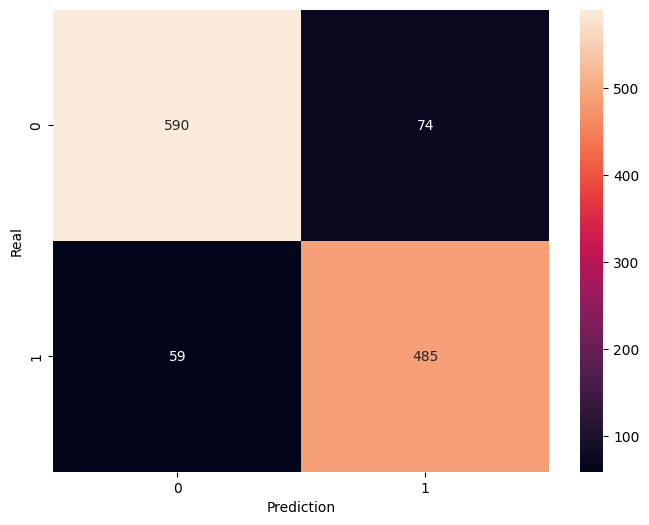

In [ ]:
# CREAR FIGURA
fig, ax = plt.subplots(figsize=(8, 6))

# MATRIZ CON HEATMAP
sns.heatmap(confusion_matrix(y_test, predict_class), annot=True, fmt='.0f', ax=ax)

# ETIQUETAS EJES
plt.ylabel('Real')
plt.xlabel('Prediction')

In [ ]:
TP = conf_class[1, 1]; TN = conf_class[0, 0] ; FP = conf_class[0, 1] ; FN = conf_class[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  485  TN:  590  FP:  74  FN:  59


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true=y_test, y_pred=predict_class)

0.8676207513416816

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true=y_test, y_pred=predict_class)

0.8915441176470589

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true=y_test, y_pred=predict_class)

0.8794197642792384

In [ ]:
specificity = TN / (TN + FP)
print(specificity)

0.8885542168674698


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


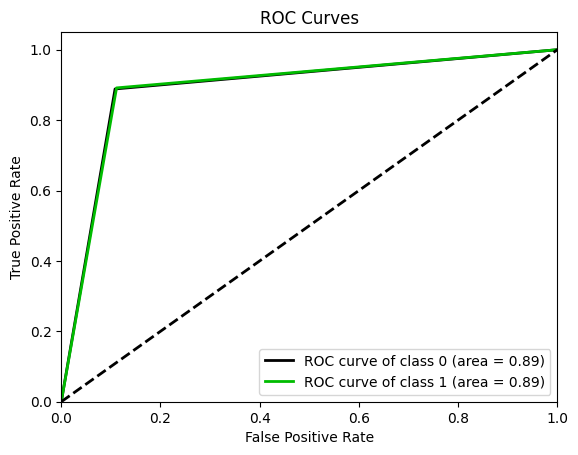

In [ ]:
import scikitplot as skplt
from scikitplot.metrics import plot_roc
plot_roc(y_test, xgb.predict_proba(X_test), plot_micro = False, plot_macro= False);

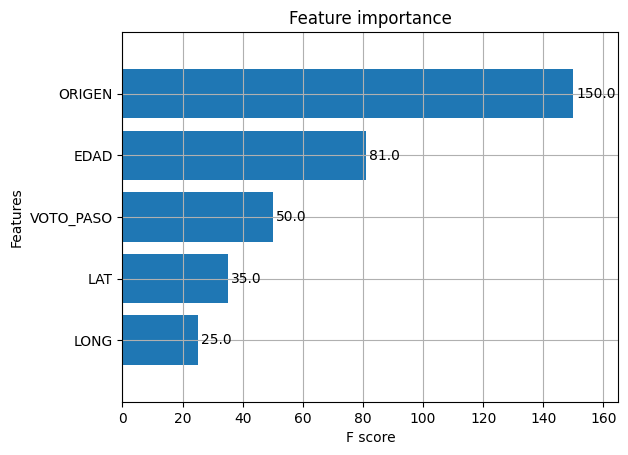

In [ ]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

In [ ]:
!pip list -v


Package                       Version              Location                                Installer
----------------------------- -------------------- --------------------------------------- ---------
absl-py                       1.4.0                /usr/local/lib/python3.10/dist-packages pip
alabaster                     0.7.13               /usr/local/lib/python3.10/dist-packages pip
albumentations                1.2.1                /usr/local/lib/python3.10/dist-packages pip
altair                        4.2.2                /usr/local/lib/python3.10/dist-packages pip
anyio                         3.6.2                /usr/local/lib/python3.10/dist-packages pip
appdirs                       1.4.4                /usr/local/lib/python3.10/dist-packages pip
argon2-cffi                   21.3.0               /usr/local/lib/python3.10/dist-packages pip
argon2-cffi-bindings          21.2.0               /usr/local/lib/python3.10/dist-packages pip
array-record                  0.2.0   